In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from mpl_settings_v3 import *

from metodos import choose_solver, Qtest, QtildeTest

## **Definiciones**

$$
Q(t) = \dfrac{v^{(1)}(t,k) - y(t)}{v^{(2)}(t,k/2) - y(t)} \simeq 2^p
$$


$$
\tilde{Q}(t) = \dfrac{v^{(1)}(t,k) -v^{(2)}(t,k/2)}{v^{(2)}(t,k/2) -v^{(3)}(t,k/4)} \simeq 2^p
$$

## **Test 1**

Ecuación

$$
\begin{align}
y(t) &= \lambda y + \sin(2\pi t) \\
y(0) &= 1
\end{align}
$$

Solución analítica:

$$
y(t) = \dfrac{\lambda}{\lambda^2+4\pi^2} \sin(2\pi t) + \left[e^{\lambda t} - \cos(2\pi t) \right] \dfrac{2\pi}{\lambda^2+4\pi^2}
$$

In [2]:
#method = 'eulerImproved'
method = 'RK4'

solver = choose_solver(method)
    
def f(y, t):
    return -y + np.sin(2*np.pi*t)

def y_theo(t, l=-1):
    a = (l**2+4*np.pi**2)
    return -(l/a)*np.sin(2*np.pi*t) + (np.exp(l*t) - np.cos(2*np.pi*t)) * (2*np.pi/a) + np.exp(l*t)

l = -1
y0 = 1
t0 = 0
T = 2
theo_time = np.linspace(t0, T, 1000)
k_values = [0.1, 0.01, 0.001]
solutions = {}
times = {}
for k in k_values:
    times[k], solutions[k] = solver(f, k, t0, T, y0)
    
    
Qk = 0.0001
Qtime, Q   = Qtest(f, Qk, t0, T, y0, y_theo, method=method)   
Q2time, Q2 = QtildeTest(f, Qk, t0, T, y0, method=method)   

Help on function RK4 in module metodos:

RK4(f, k, a, b, y0)

None


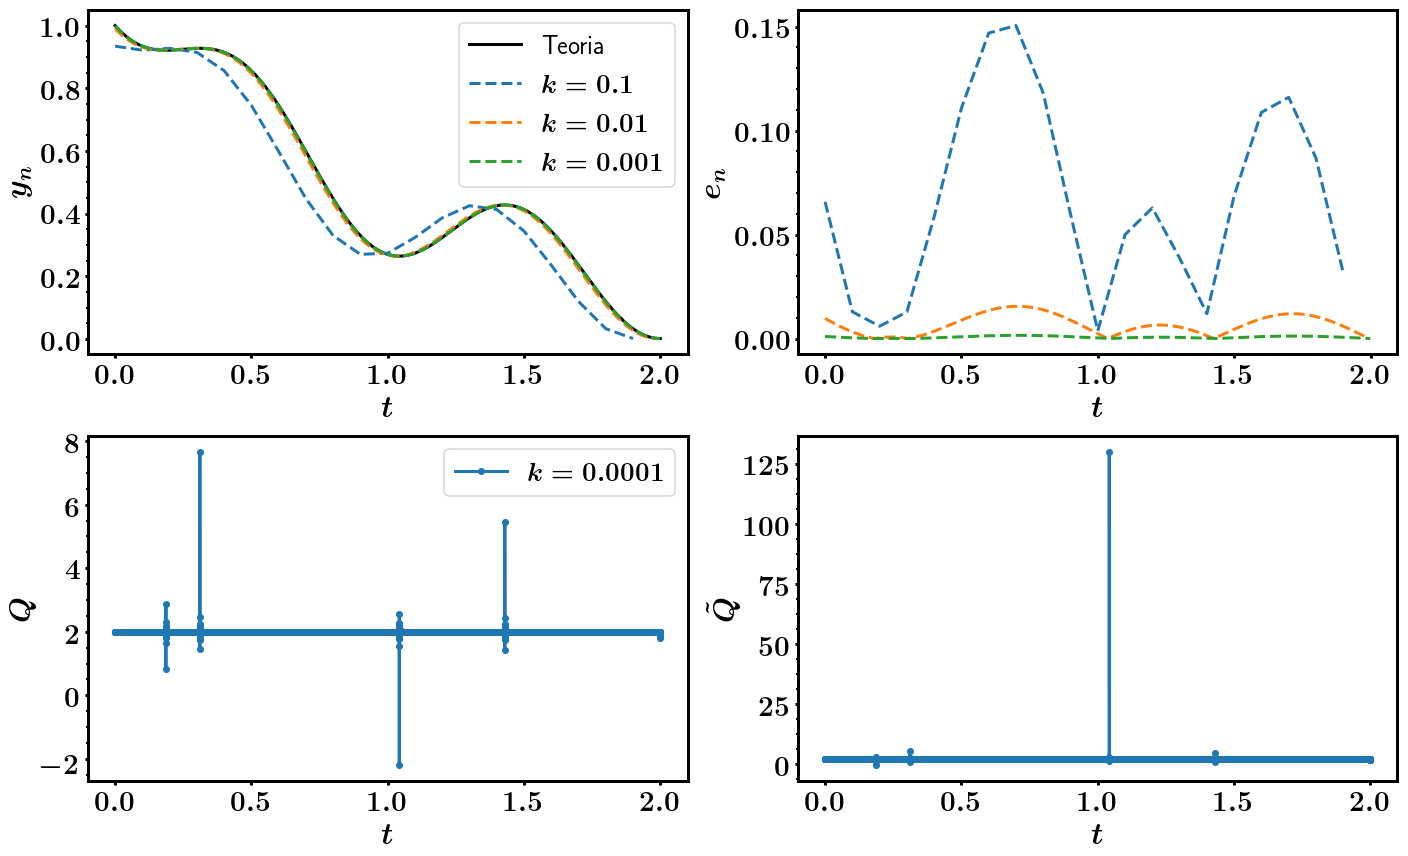

In [3]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols,6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlabel(r'$t$')

ax = axes[0,0]
ax.set_ylabel(r'$y_n$')
ax.plot(theo_time, y_theo(theo_time, l), color='k', label='Teoria')
for k in k_values:
    ax.plot(times[k], solutions[k], '--', label=r'$k = {{{}}}$'.format(k))
ax.legend()

ax = axes[0,1]

ax.set_ylabel(r'$e_n$')
for k in k_values:
    err = np.fabs(y_theo(times[k], l) - solutions[k])
    ax.plot(times[k], err, '--')


ax = axes[1,0]
ax.set_ylim(1, 5)
ax.set_ylabel(r'$Q$')
ax.plot(Qtime, Q, '-o', label=r'$k = {{{}}}$'.format(Qk))
ax.legend()

ax = axes[1,1]
ax.set_ylim(1, 5)
ax.set_ylabel(r'$\tilde{Q}$')
ax.plot(Q2time, Q2, '-o')

plt.tight_layout()
plt.show()

## **Test 2**

Péndulo forzado:

$$
\begin{align}
\dfrac{d^2\Theta}{dt^2} + \sin \Theta &= A \cos(\omega t) \\
\Theta(0) &= 0,\quad \dfrac{d\Theta}{dt}(0) = 0
\end{align}
$$

In [43]:
def pendulum(k, a, b, u0, v0, A, omega):

    time = np.arange(a, b, k)
    u_values = np.zeros(time.shape)
    v_values = np.zeros(time.shape)
    
    v, u = v0, u0
    
    for i, t in enumerate(time):
    
        u_tilde = u + k*v
        v_tilde = k*(-np.sin(u) + A*np.cos(omega*t))
        u = u + k*(v + v_tilde)/2
        v = v + k*(-np.sin((u+u_tilde)/2) + A*np.cos(omega*(t+k/2)))
         
        u_values[i] = u
        v_values[i] = v    
                   
    return time, u_values, v_values


def Qpendulum(k, a, b, u0, v0, A, omega):
    
    time,  u, v   = pendulum(k, a, b, u0, v0, A, omega)
    time2, u2, v2 = pendulum(k/2, a, b, u0, v0, A, omega)
    time3, u3, v3 = pendulum(k/4, a, b, u0, v0, A, omega)
    
    num   = v - v2[::2]
    denom = (v2 - v3[::2])[::2]
    
    Q = num / denom
    
    return time, Q


u0 = 0 # Initial angular position
v0 = 0 # Initial angular speed
A = 1
omega = 1
t0 = 0
T = 10
k = 0.1


k_values = [k, k/2, k/4]
solutions = {}
times = {}
for k in k_values:
    time, u_values, v_values = pendulum(k, t0, T, u0, v0, A, omega)
    times[k] = time
    solutions[k] = (u_values, v_values)

Q2time, Q2 = Qpendulum(k, t0, T, u0, v0, A, omega)

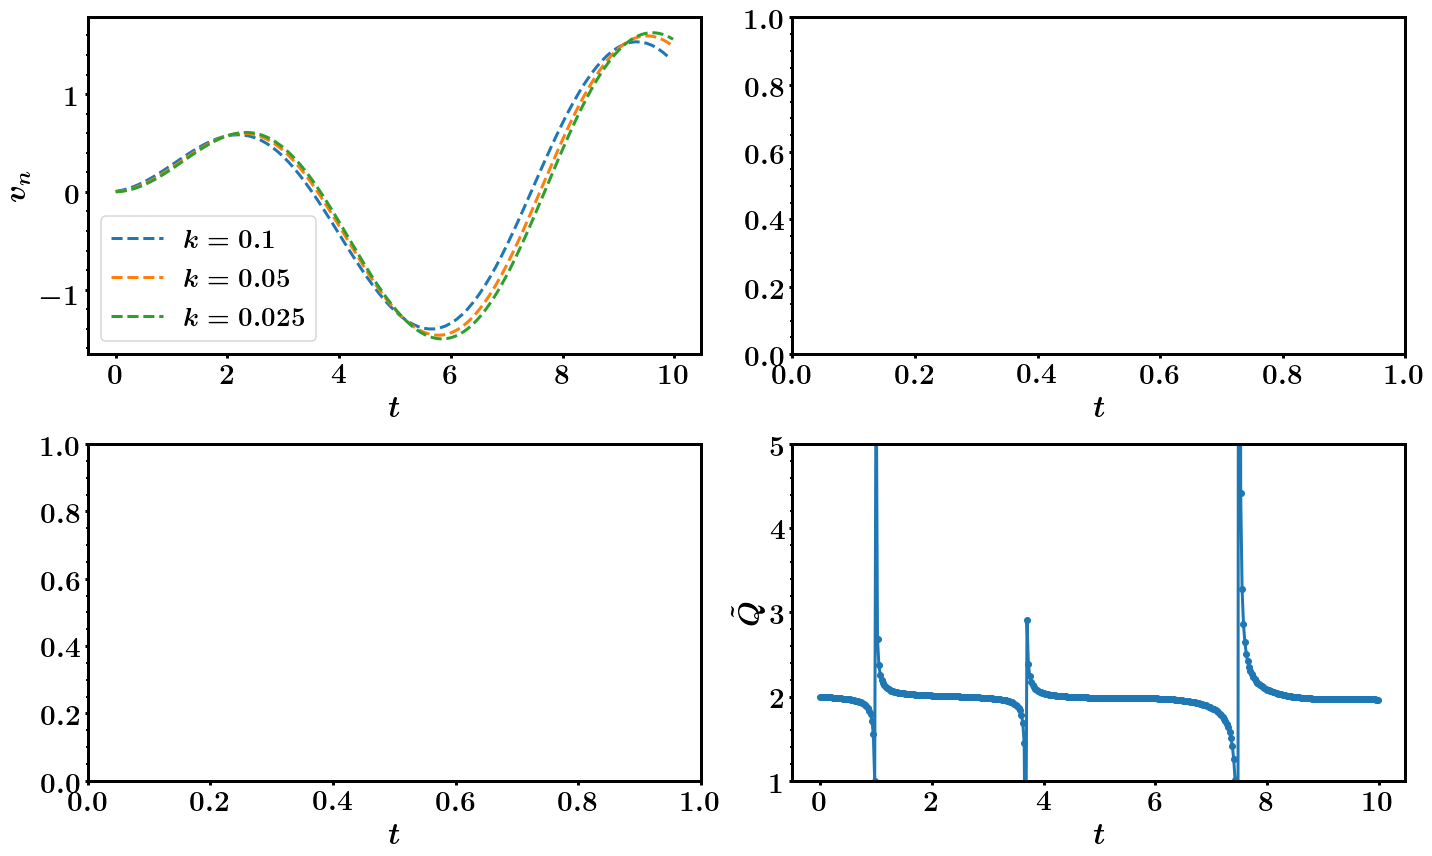

In [45]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols,6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlabel(r'$t$')


ax = axes[0,0]
ax.set_ylabel(r'$v_n$')
for k in k_values:
    ax.plot(times[k], solutions[k][0], '--', label=r'$k = {{{}}}$'.format(k))
ax.legend()

"""
ax = axes[0,1]
ax.set_ylabel(r'$e_n$')
for k in k_values:
    time = euler_times[k]
    err = np.fabs(y_theo(time, l) - y_euler_sol[k])
    ax.plot(euler_times[k], err, '--')
"""

ax = axes[1,1]
ax.set_ylim(1, 5)
ax.set_ylabel(r'$\tilde{Q}$')
ax.plot(Q2time, Q2, '-o')

plt.tight_layout()
plt.show()

## **Test 3**

Problema:

$$
\begin{align}
\dfrac{dy}{dt} &= y - y^3 + \sin(t) \\
y(0) &= 0
\end{align}
$$

In [2]:
#method = 'eulerImproved'
method = 'RK4'

solver = choose_solver(method)
    
def f(y, t):
    return y - y**3 + np.sin(t)

y0 = 0
t0 = 0
T = 10

k_values = [0.1, 0.01, 0.001]
solutions = {}
times = {}
for k in k_values:
    times[k], solutions[k] = solver(f, k, t0, T, y0)
    
    
Qk = 0.0001 
Q2time, Q2 = QtildeTest(f, Qk, t0, T, y0, method=method)   

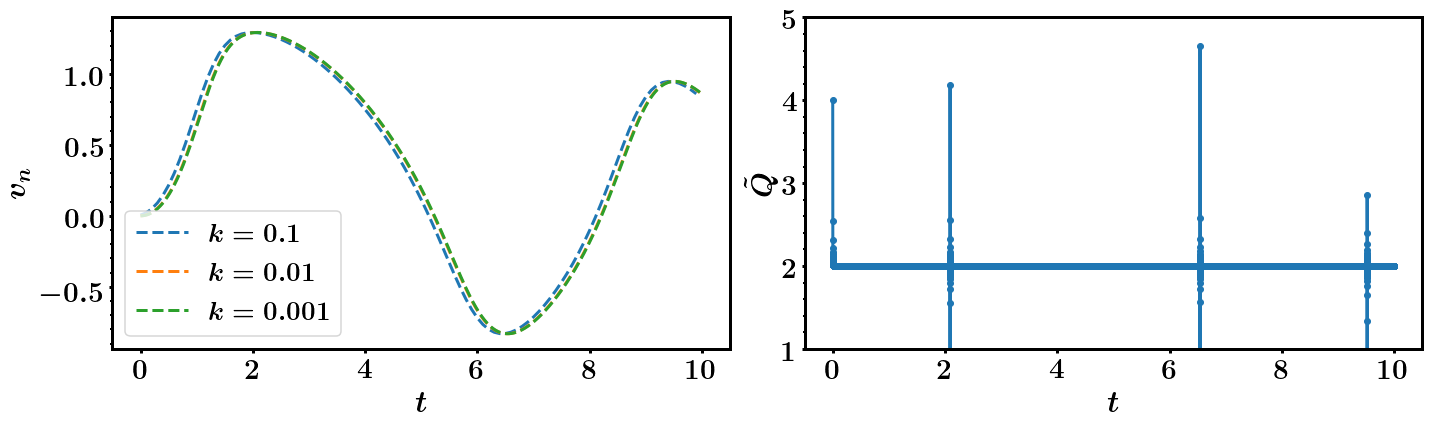

In [5]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols,6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlabel(r'$t$')


ax = axes[0]
ax.set_ylabel(r'$v_n$')
for k in k_values:
    ax.plot(times[k], solutions[k], '--', label=r'$k = {{{}}}$'.format(k))
ax.legend()


ax = axes[1]
ax.set_ylim(1, 5)
ax.set_ylabel(r'$\tilde{Q}$')
ax.plot(Q2time, Q2, '-o')

plt.tight_layout()
plt.show()

In [29]:
a = t0
b = T
time,  v  = solver(f, k, a, b, y0)
time2, v2 = solver(f, k/2, a, b, y0)
time3, v3 = solver(f, k/4, a, b, y0) 

num   = v - v2[::2]
denom = (v2 - v3[::2])[::2]

Q = num / denom

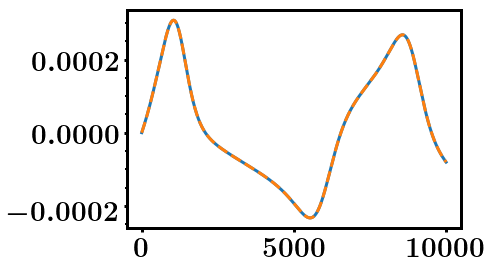

In [30]:
plt.plot(num/2)
plt.plot(denom, '--')

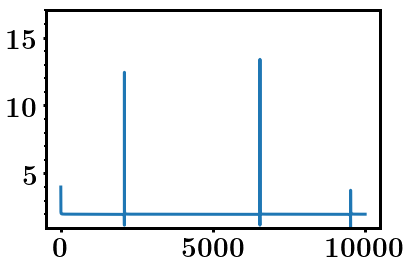

In [31]:
plt.ylim(1, 17)
plt.plot(Q)

In [49]:
method = 'eulerImproved'

solver = choose_solver(method)
    
def f(y, t):
    return y - y**3 + np.sin(t)

y0 = 0
t0 = 0
T = 10
tol = 1e-4
k = 0.1

it = 1
print('it      k     tf     err    tol')
while True:
    time,  sol  = solver(f, k,   t0, T, y0) 
    time2, sol2 = solver(f, k/2, t0, T, y0) 
    
    diff = np.fabs(sol2[::2] - sol)
    
    arr = np.where(diff>3*tol)[0]
    #print(diff[:5])
    #print(arr[:5])
    
    if arr.shape[0] > 0:
        index = arr[0]
    else:
        index = -1
    
    t = time[index]
    #err = np.max(np.fabs(diff))
    err = diff[index]
    
    print('{:2d} {:.4f} {:.4f} {:.5f} {:.4f} {}'.format(it, k, t, err, tol, index))
    
    if err <= 3*tol or it >= 10:
        break
        
    k = k/2
    it += 1

it      k     tf     err    tol
 1 0.1000 0.0000 0.00375 0.0001 0
 2 0.0500 0.0000 0.00094 0.0001 0
 3 0.0250 0.0250 0.00055 0.0001 1
 4 0.0125 0.0500 0.00038 0.0001 4
 5 0.0063 0.0875 0.00030 0.0001 14
 6 0.0031 0.1750 0.00030 0.0001 56
 7 0.0016 0.3297 0.00030 0.0001 211
 8 0.0008 0.5984 0.00030 0.0001 766
 9 0.0004 9.9996 0.00006 0.0001 -1


In [34]:
np.max(diff)

0.0002400102284422223

In [41]:
np.where(diff>1)[0].shape[0]

0